<a href="https://colab.research.google.com/github/Hari-Aakash/Data-Science-Codes/blob/main/MyntraAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
products=pd.read_excel("Myntra dataset.xlsx",sheet_name="dim_products")
products

,Product ID,Category,Sub-category,Product Name,Brand Name,Size,Color,Ratings
0,P0001,Women,Topwear,T-Shirts,Roadster,40,Black,4
1,P0002,Women,Topwear,T-Shirts,Roadster,40,Blue,5
2,P0003,Women,Topwear,T-Shirts,Roadster,42,White,3
3,P0004,Women,Topwear,T-Shirts,Roadster,44,Green,2
4,P0005,Women,Topwear,T-Shirts,Puma,38,Olive,5
...,...,...,...,...,...,...,...,...
3066,P3067,Kids,Footwear,Sandals,Campus,9-12M,Olive,5
3067,P3068,Kids,Footwear,Sandals,Campus,9-12M,Teal,3
3068,P3069,Kids,Footwear,Sandals,Campus,3-6M,Sea Green,5
3069,P3070,Kids,Footwear,Sandals,Campus,3-6M,Turquoise Blue,5


In [4]:
customers=pd.read_excel("Myntra dataset.xlsx",sheet_name="dim_customers")
customers

,Customer ID,Customer Age,City,State
0,C001,30,Mumbai,Maharashtra
1,C002,35,Mumbai,Maharashtra
2,C003,36,Mumbai,Maharashtra
3,C004,40,Pune,Maharashtra
4,C005,25,Pune,Maharashtra
...,...,...,...,...
95,C096,36,Jodhpur,Rajasthan
96,C097,37,Jodhpur,Rajasthan
97,C098,38,Udaipur,Rajasthan
98,C099,39,Udaipur,Rajasthan


In [5]:
orders=pd.read_excel("Myntra dataset.xlsx",sheet_name="fact_orders")
orders

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%
0,OD0001,C001,P0001,2021-05-20,349,0.30
1,OD0002,C002,P0001,2021-01-19,350,0.30
2,OD0003,C003,P0001,2021-10-28,351,0.30
3,OD0004,C004,P0001,2021-05-20,352,0.25
4,OD0005,C005,P0001,2022-11-08,353,0.25
...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50
3496,OD3497,C082,P3071,2022-07-08,707,0.50
3497,OD3498,C083,P3071,2021-02-06,1819,0.50
3498,OD3499,C084,P3071,2021-07-18,856,0.50


In [7]:
products.info()
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product ID    3071 non-null   object
 1   Category      3071 non-null   object
 2   Sub-category  3071 non-null   object
 3   Product Name  3071 non-null   object
 4   Brand Name    3071 non-null   object
 5   Size          3071 non-null   object
 6   Color         3071 non-null   object
 7   Ratings       3071 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 192.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer ID   100 non-null    object
 1   Customer Age  100 non-null    int64 
 2   City          100 non-null    object
 3   State         100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.3+ KB


In [8]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        3500 non-null   object        
 1   Customer ID     3500 non-null   object        
 2   Product ID      3500 non-null   object        
 3   Date            3500 non-null   datetime64[ns]
 4   Original Price  3500 non-null   int64         
 5   Discount%       3500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 164.2+ KB


In [9]:
orders.describe()


,Date,Original Price,Discount%
count,3500,3500.000000,3500.000000
mean,2022-02-15 04:32:46.628571392,843.840000,0.355146
min,2021-01-01 00:00:00,123.000000,0.100000
25%,2021-07-23 00:00:00,456.000000,0.300000
50%,2022-02-19 00:00:00,634.000000,0.350000
75%,2022-09-06 00:00:00,1119.000000,0.420000
max,2023-03-31 00:00:00,22365.000000,0.550000
std,NaN,689.706016,0.100804


In [11]:
products.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
3066,False
3067,False
3068,False
3069,False


In [12]:
customers.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
95,False
96,False
97,False
98,False


In [13]:
orders.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
3495,False
3496,False
3497,False
3498,False


In [14]:
products.drop_duplicates()

,Product ID,Category,Sub-category,Product Name,Brand Name,Size,Color,Ratings
0,P0001,Women,Topwear,T-Shirts,Roadster,40,Black,4
1,P0002,Women,Topwear,T-Shirts,Roadster,40,Blue,5
2,P0003,Women,Topwear,T-Shirts,Roadster,42,White,3
3,P0004,Women,Topwear,T-Shirts,Roadster,44,Green,2
4,P0005,Women,Topwear,T-Shirts,Puma,38,Olive,5
...,...,...,...,...,...,...,...,...
3066,P3067,Kids,Footwear,Sandals,Campus,9-12M,Olive,5
3067,P3068,Kids,Footwear,Sandals,Campus,9-12M,Teal,3
3068,P3069,Kids,Footwear,Sandals,Campus,3-6M,Sea Green,5
3069,P3070,Kids,Footwear,Sandals,Campus,3-6M,Turquoise Blue,5


In [15]:
products.isnull()

,Product ID,Category,Sub-category,Product Name,Brand Name,Size,Color,Ratings
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
3066,False,False,False,False,False,False,False,False
3067,False,False,False,False,False,False,False,False
3068,False,False,False,False,False,False,False,False
3069,False,False,False,False,False,False,False,False


In [16]:
orders

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%
0,OD0001,C001,P0001,2021-05-20,349,0.30
1,OD0002,C002,P0001,2021-01-19,350,0.30
2,OD0003,C003,P0001,2021-10-28,351,0.30
3,OD0004,C004,P0001,2021-05-20,352,0.25
4,OD0005,C005,P0001,2022-11-08,353,0.25
...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50
3496,OD3497,C082,P3071,2022-07-08,707,0.50
3497,OD3498,C083,P3071,2021-02-06,1819,0.50
3498,OD3499,C084,P3071,2021-07-18,856,0.50


In [17]:
orders["Month"]=orders["Date"].dt.strftime("%B")
orders

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%,Month
0,OD0001,C001,P0001,2021-05-20,349,0.30,May
1,OD0002,C002,P0001,2021-01-19,350,0.30,January
2,OD0003,C003,P0001,2021-10-28,351,0.30,October
3,OD0004,C004,P0001,2021-05-20,352,0.25,May
4,OD0005,C005,P0001,2022-11-08,353,0.25,November
...,...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50,January
3496,OD3497,C082,P3071,2022-07-08,707,0.50,July
3497,OD3498,C083,P3071,2021-02-06,1819,0.50,February
3498,OD3499,C084,P3071,2021-07-18,856,0.50,July


In [23]:
orders["Total Price"]=orders["Original Price"]-(orders["Original Price"] * orders["Discount%"])
orders

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%,Month,Total Price
0,OD0001,C001,P0001,2021-05-20,349,0.30,May,244.30
1,OD0002,C002,P0001,2021-01-19,350,0.30,January,245.00
2,OD0003,C003,P0001,2021-10-28,351,0.30,October,245.70
3,OD0004,C004,P0001,2021-05-20,352,0.25,May,264.00
4,OD0005,C005,P0001,2022-11-08,353,0.25,November,264.75
...,...,...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50,January,342.50
3496,OD3497,C082,P3071,2022-07-08,707,0.50,July,353.50
3497,OD3498,C083,P3071,2021-02-06,1819,0.50,February,909.50
3498,OD3499,C084,P3071,2021-07-18,856,0.50,July,428.00


In [21]:
gb=orders.groupby(["Month"]).agg({"Original Price" : "sum"})
gb

,Original Price
Month,
April,189860
August,234440
December,235750
February,313071
January,362024
July,214382
June,219278
March,331556
May,245850


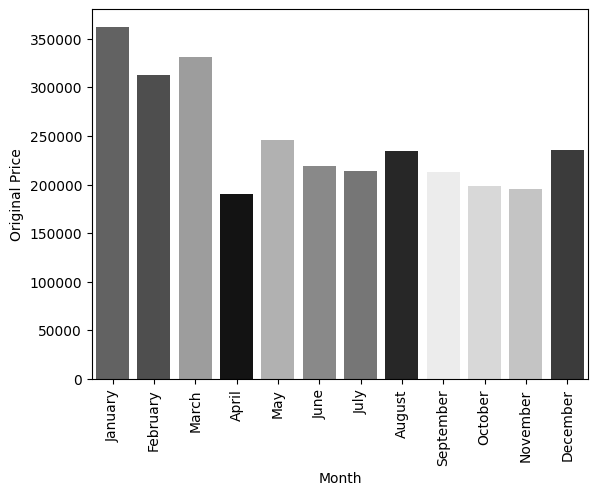

In [30]:
sns.barplot(x=gb.index,y=gb["Original Price"],order=["January","February","March","April","May","June","July","August","September","October","November","December"],hue=gb.index,palette ='gray' )
plt.xticks(rotation=90)
plt.show()

In [31]:
df = pd.merge(left=orders,right = products,on = "Product ID",how = "inner")
df

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%,Month,Total Price,Category,Sub-category,Product Name,Brand Name,Size,Color,Ratings
0,OD0001,C001,P0001,2021-05-20,349,0.30,May,244.30,Women,Topwear,T-Shirts,Roadster,40,Black,4
1,OD0002,C002,P0001,2021-01-19,350,0.30,January,245.00,Women,Topwear,T-Shirts,Roadster,40,Black,4
2,OD0003,C003,P0001,2021-10-28,351,0.30,October,245.70,Women,Topwear,T-Shirts,Roadster,40,Black,4
3,OD0004,C004,P0001,2021-05-20,352,0.25,May,264.00,Women,Topwear,T-Shirts,Roadster,40,Black,4
4,OD0005,C005,P0001,2022-11-08,353,0.25,November,264.75,Women,Topwear,T-Shirts,Roadster,40,Black,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50,January,342.50,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4
3496,OD3497,C082,P3071,2022-07-08,707,0.50,July,353.50,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4
3497,OD3498,C083,P3071,2021-02-06,1819,0.50,February,909.50,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4
3498,OD3499,C084,P3071,2021-07-18,856,0.50,July,428.00,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4


In [32]:
gb1=df.groupby("Category").agg({"Total Price":"sum"})
gb1

,Total Price
Category,
Beauty,312016.36
Kids,445682.43
Men,586456.23
Women,546934.66


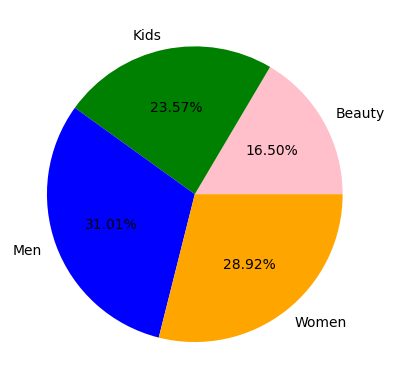

In [83]:
plt.pie(gb1["Total Price"],labels = gb1.index,autopct="%1.2f%%",colors=['pink','green','blue','orange'])
plt.show()

In [41]:
df["Total Price""Beauty"].sum()

1891089.6800000002

In [56]:
df[df["Category"]=="Beauty"]["Total Price"].sum()

312016.36

In [50]:
Beauty = df[df["Category"] == "Beauty"]

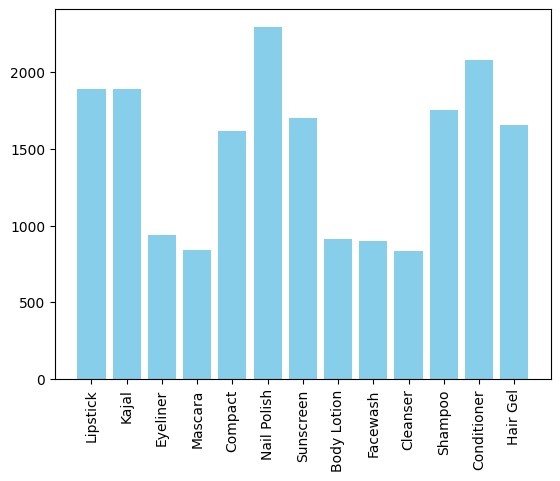

In [78]:
plt.bar(Beauty['Product Name'], Beauty['Total Price'], color='skyblue')
plt.xticks(rotation=90)
plt.show()

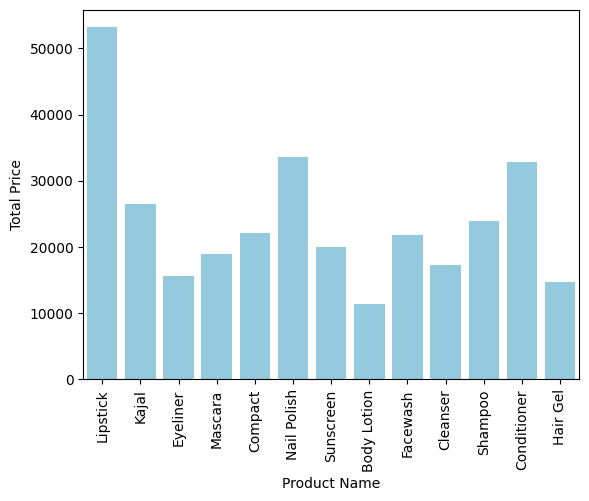

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Product Name', y='Total Price', data=Beauty,color='skyblue',errorbar=None,estimator=sum) #estimator gives the values as plt and errorbar or ci is used to eliminate the lines above the bars
plt.xticks(rotation=90)
plt.show()

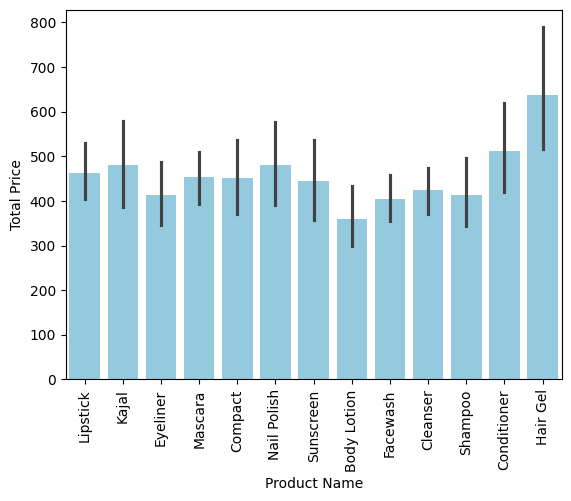

In [80]:
sns.barplot(x='Product Name', y='Total Price', data=Beauty,color='skyblue') #estimator gives the values as plt and errorbar or ci is used to eliminate the lines above the bars
plt.xticks(rotation=90)
plt.show()